In [ ]:
import requests
import json
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

# Fetch FED Funds Rate (FRED) using FRED Public API

In [ ]:
# Import or assign API key
api_key = "58394c9866a5e8ff6f27cbd23af8e6f7"

# Define the FRED API endpoint
base_url = 'https://api.stlouisfed.org/fred/'

'''
Get observation data from the FRED API
'''

# Assign endpoint
obs_endpoint = 'series/observations'

# Assign parameters
series_id = 'FEDFUNDS'
start_date = '1999-01-01'
end_date = '2024-01-31'
#ts_frequency = 'm'
#ts_units = 'pc1'

obs_params = {
    'series_id': series_id,
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': start_date,
    'observation_end': end_date,
    # 'frequency': ts_frequency
    # 'units': ts_units
}

# Make request to FRED API
response = requests.get(base_url + obs_endpoint, params=obs_params)

# Format data
if response.status_code == 200:
    res_data = response.json()
    obs_data = pd.DataFrame(res_data['observations'])
    obs_data['date'] = pd.to_datetime(obs_data['date'])
    #obs_data.set_index('date', inplace=True)
    obs_data['FUND RATE'] = obs_data['value'].astype(float)
    obs_data = obs_data.drop(columns=["realtime_start", "realtime_end","value"])

else:
    print('Failed to retrieve data. Status code:', response.status_code)

In [ ]:
obs_data = obs_data.drop_duplicates(subset=['date'], keep="last").reset_index(drop=True)
obs_data.head()

,date,FUND RATE
0,1999-01-01,4.63
1,1999-02-01,4.76
2,1999-03-01,4.81
3,1999-04-01,4.74
4,1999-05-01,4.74


In [ ]:
obs_data.sort_values(by='date',inplace=True)

In [ ]:
df_intr = obs_data.set_index('date')

In [ ]:
df_intr

,FUND RATE
date,
1999-01-01,4.63
1999-02-01,4.76
1999-03-01,4.81
1999-04-01,4.74
1999-05-01,4.74
...,...
2023-09-01,5.33
2023-10-01,5.33
2023-11-01,5.33


In [ ]:
df_intr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 301 entries, 1999-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FUND RATE  301 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


In [ ]:
df_intr.head(), df_intr.shape

(            FUND RATE
 date                 
 1999-01-01       4.63
 1999-02-01       4.76
 1999-03-01       4.81
 1999-04-01       4.74
 1999-05-01       4.74,
 (301, 1))

In [ ]:
#Export  Interest rate Dataset to google drive
# path = '/content/drive/MyDrive/DATA 698/Data Science Project/timeseries_Interest.csv'
# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   df_intr.to_csv(f)


# Fetch Inflation data using FRED Public Data API

In [ ]:
# Import or assign API key
api_key = "58394c9866a5e8ff6f27cbd23af8e6f7"

# Define the FRED API endpoint
base_url = 'https://api.stlouisfed.org/fred/'

'''
Get observation data from the FRED API
'''

# Assign endpoint
obs_endpoint = 'series/observations'

# Assign parameters
series_id = 'T10YIE'   #FEDFUNDS
start_date = '1999-01-01'
end_date = '2024-01-31'
#ts_frequency = 'm'
#ts_units = 'pc1'

obs_params = {
    'series_id': series_id,
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': start_date,
    'observation_end': end_date,
    # 'frequency': ts_frequency
    # 'units': ts_units
}

# Make request to FRED API
response = requests.get(base_url + obs_endpoint, params=obs_params)

# Format data
if response.status_code == 200:
    res_data = response.json()
    obs_data = pd.DataFrame(res_data['observations'])
    obs_data['date'] = pd.to_datetime(obs_data['date'])
    obs_data['Year']=obs_data['date'].dt.year
    obs_data['Month']=obs_data['date'].dt.month
    obs_data.set_index('date', inplace=True)
    obs_data['Inflation'] = obs_data['value']#.astype(float)
    obs_data = obs_data.drop(columns=["realtime_start", "realtime_end","value"])

else:
    print('Failed to retrieve data. Status code:', response.status_code)

# DATA WRANGLING TO REMOVE "." FROM INFLATION DATASET

In [ ]:
obs_data.Inflation = pd.to_numeric(obs_data['Inflation'], errors='coerce')
obs_data.head(30),obs_data.shape,obs_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5500 entries, 2003-01-02 to 2024-01-31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       5500 non-null   int32  
 1   Month      5500 non-null   int32  
 2   Inflation  5275 non-null   float64
dtypes: float64(1), int32(2)
memory usage: 128.9 KB


(            Year  Month  Inflation
 date                              
 2003-01-02  2003      1       1.64
 2003-01-03  2003      1       1.62
 2003-01-06  2003      1       1.63
 2003-01-07  2003      1       1.62
 2003-01-08  2003      1       1.71
 2003-01-09  2003      1       1.78
 2003-01-10  2003      1       1.75
 2003-01-13  2003      1       1.77
 2003-01-14  2003      1       1.76
 2003-01-15  2003      1       1.80
 2003-01-16  2003      1       1.79
 2003-01-17  2003      1       1.80
 2003-01-20  2003      1        NaN
 2003-01-21  2003      1       1.78
 2003-01-22  2003      1       1.72
 2003-01-23  2003      1       1.78
 2003-01-24  2003      1       1.80
 2003-01-27  2003      1       1.82
 2003-01-28  2003      1       1.81
 2003-01-29  2003      1       1.85
 2003-01-30  2003      1       1.80
 2003-01-31  2003      1       1.81
 2003-02-03  2003      2       1.81
 2003-02-04  2003      2       1.84
 2003-02-05  2003      2       1.90
 2003-02-06  2003      2    

In [ ]:
obs_data['Inflation'] = obs_data['Inflation'].replace(np.NaN,0)
obs_data = obs_data[obs_data['Inflation'] != 0.00]
obs_data.head(30),obs_data.shape

(            Year  Month  Inflation
 date                              
 2003-01-02  2003      1       1.64
 2003-01-03  2003      1       1.62
 2003-01-06  2003      1       1.63
 2003-01-07  2003      1       1.62
 2003-01-08  2003      1       1.71
 2003-01-09  2003      1       1.78
 2003-01-10  2003      1       1.75
 2003-01-13  2003      1       1.77
 2003-01-14  2003      1       1.76
 2003-01-15  2003      1       1.80
 2003-01-16  2003      1       1.79
 2003-01-17  2003      1       1.80
 2003-01-21  2003      1       1.78
 2003-01-22  2003      1       1.72
 2003-01-23  2003      1       1.78
 2003-01-24  2003      1       1.80
 2003-01-27  2003      1       1.82
 2003-01-28  2003      1       1.81
 2003-01-29  2003      1       1.85
 2003-01-30  2003      1       1.80
 2003-01-31  2003      1       1.81
 2003-02-03  2003      2       1.81
 2003-02-04  2003      2       1.84
 2003-02-05  2003      2       1.90
 2003-02-06  2003      2       1.88
 2003-02-07  2003      2    

In [ ]:
df_inf = obs_data.groupby(['Year', 'Month'])['Inflation'].mean().reset_index()
df_inf['date'] = pd.to_datetime(dict(year=df_inf.Year, month=df_inf.Month, day=1))

In [ ]:
df_inf =df_inf[['date','Inflation']].set_index('date')

In [ ]:
df_inf.sort_values(by='date',inplace=True)

In [ ]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2003-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Inflation  253 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


# Fetch Unemployment data using BLS Public Data API

In [ ]:
# Import or assign API key
ak = "64ff04ec58d44dd1ab4427731c684fc2"

In [ ]:
headers = {'Content-type': 'application/json'}

unemploy = pd.DataFrame()

# Fetch the 1st 20years of data
unemploy01 = json.dumps({"seriesid": ['LNS14000000'], "startyear": "1999", "endyear": "2019","registrationkey":ak})
p1 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=unemploy01, headers=headers)
json_unemploy01 = json.loads(p1.text)

# Fetch the last 5years of data
unemploy02 = json.dumps({"seriesid": ['LNS14000000'], "startyear": "2020", "endyear": "2024","registrationkey":ak})
p2 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=unemploy02, headers=headers)
json_unemploy02 = json.loads(p2.text)

unemploy_list = [json_unemploy01, json_unemploy02]

for json_data in unemploy_list:
    for series in json_data['Results']['series']:
        seriesId = series['seriesID']
        rows = []
        for item in series['data']:
            year = item['year']
            period = item['period']
            value = item['value']
            footnotes = ""
            for footnote in item['footnotes']:
                if footnote:
                    footnotes = footnotes + footnote['text'] + ','
            if 'M01' <= period <= 'M12':
                rows.append([seriesId, year, period, value, footnotes[0:-1]])
        unemploy_part = pd.DataFrame(rows, columns=["series id", "year", "period", "value", "footnotes"])
        unemploy = pd.concat([unemploy, unemploy_part]).drop(columns=["series id", "footnotes"])

In [ ]:
unemploy['period'] = unemploy['period'].map({'M01':'01', 'M02':'02', 'M03':'03', 'M04':'04', 'M05':'05', 'M06':'06', 'M07':'07', 'M08':'08', 'M09':'09',
       'M10':'10', 'M11':'11', 'M12':'12'})

In [ ]:
unemploy['date'] = pd.to_datetime(unemploy['year'].astype(str) + unemploy['period'] + '01', format='%Y%m%d')
unemploy['UNEMPLOYMENT RATE'] = unemploy['value'].astype(float)
unemploy = unemploy.drop(columns=["period","value","year"],axis=1)
unemploy = unemploy.drop_duplicates(subset=['date'], keep="last").reset_index(drop=True)

In [ ]:
unemploy.isnull().any()

date                 False
UNEMPLOYMENT RATE    False
dtype: bool

In [ ]:
df_unemp = unemploy.set_index("date")
df_unemp.sort_values(by='date',inplace=True)
df_unemp.head()

,UNEMPLOYMENT RATE
date,
1999-01-01,4.3
1999-02-01,4.4
1999-03-01,4.2
1999-04-01,4.3
1999-05-01,4.2


#  FEATURES

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df


In [ ]:
def plot_time_series(df, dependent_var):
    """
    This function generates a 2x2 grid of boxplots to visualize the time series data.
    ( this function assumes that the input dataframe has columns named dayofweek, month, hour, and year. If your dataframe uses different column names for these time-related variables, you should modify the function accordingly.)

    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe containing the time series data.

    dependent_var : str
        The column name of the dependent variable in the dataframe.

    Returns
    -------
    None
    """

    # Assert if the required columns are present in the dataframe
    assert 'dayofweek' in df.columns, "Input dataframe must have a 'dayofweek' column"
    assert 'month' in df.columns, "Input dataframe must have a 'month' column"
    #assert 'hour' in df.columns, "Input dataframe must have an 'hour' column"
    assert 'year' in df.columns, "Input dataframe must have a 'year' column"
    assert dependent_var in df.columns, f"Input dataframe must have a '{dependent_var}' column"
    """ this function assumes that the input dataframe has columns named dayofweek, month, hour, and year. If your dataframe uses different column names for these time-related variables, you should modify the function accordingly. """

    # Initialize the figure with a 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(10,10))

    # Day of Week
    dow_labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
    g = sns.boxplot(x=df.dayofweek, y=df[dependent_var], ax=axes[0][0])
    g.set_xticklabels(dow_labels)
    g.set_ylabel('')

    # Month of Year
    g = sns.boxplot(x=df.month, y=df[dependent_var], ax=axes[0][1])
    g.set_ylabel('')


    # Year
    g = sns.boxplot(x=df.year, y=df[dependent_var], ax=axes[1][1])
    g.set_ylabel('')
    plt.xticks(rotation=90)

    # Set the title for the y-axis
    #fig.text(0.08, 0.5, 'Energy Consumption (MW)', va='center', rotation='vertical')

    # Display the plot
    plt.show()

#plot_time_series(df_intr, 'FUND RATE')

In [ ]:
# from sklearn.model_selection import TimeSeriesSplit

# tss = TimeSeriesSplit(n_splits=5, test_size=12, gap=1)
# df = df.sort_index()

In [ ]:
# fig, axs = plt.subplots(5, 1, figsize=(5, 10), sharex=True)

# fold = 0
# for train_idx, val_idx in tss.split(df):
#   train = df.iloc[train_idx]
#   test = df.iloc[val_idx]
#   train['FUND RATE'].plot(ax=axs[fold],label='Training Set',title=f'Data Train/Test Split Fold {fold}')
#   test['FUND RATE'].plot(ax=axs[fold],label='Test Set')
#   axs[fold].axvline(test.index.min(), color='black', ls='--')
#   fold += 1
# plt.show()

In [ ]:
# tss = TimeSeriesSplit(n_splits=5, test_size=12, gap=1)
# df = df.sort_index()


# fold = 0
# preds = []
# scores = []
# for train_idx, val_idx in tss.split(df):
#     train = df.iloc[train_idx]
#     test = df.iloc[val_idx]

#     train = create_features(train)
#     test = create_features(test)

#     FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']

#     TARGET = 'FUND RATE'

#     X_train = train[FEATURES]
#     y_train = train[TARGET]

#     X_test = test[FEATURES]
#     y_test = test[TARGET]

#     reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
#                            n_estimators=1000,
#                            early_stopping_rounds=50,
#                            objective='reg:linear',
#                            max_depth=3,
#                            learning_rate=0.01)
#     reg.fit(X_train, y_train,
#             eval_set=[(X_train, y_train), (X_test, y_test)],
#             verbose=100)

#     y_pred = reg.predict(X_test)
#     preds.append(y_pred)
#     score = np.sqrt(mean_squared_error(y_test, y_pred))
#     scores.append(score)
# prediction = pd.DataFrame(y_pred)
# prediction.set_index(y_test.index)

In [ ]:
def build_model_init(df,indicator):

  # Split train and test
  train = df.iloc[:-12]
  print('Train size: ', len(train))
  test = df.iloc[-12:]
  print('Test size: ',len(test))
  train = create_features(train)
  test = create_features(test)
  FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']

  TARGET = indicator
  X_train = train[FEATURES]
  y_train = train[TARGET]

  X_test = test[FEATURES]
  y_test = test[TARGET]

  reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', n_estimators=1000,early_stopping_rounds=50,objective='reg:linear',max_depth=3,earning_rate=0.01)
  reg = reg.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],verbose=100)

  y_pred = reg.predict(X_test)

  #preds.append(y_pred)
  residuals = y_test-y_pred
  rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
  print('Root Mean Squared Error: ',rmse)
  print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/y_test)),4))

  prediction = pd.DataFrame(y_pred)
  prediction.set_index(y_test.index,inplace=True)

  plt.figure(figsize=(10,4))
  plt.plot(df)
  plt.plot(prediction)
  plt.title(indicator, fontsize=20)
  plt.ylabel(indicator, fontsize=16)

Train size:  241
Test size:  12
[0]	validation_0-rmse:1.16910	validation_1-rmse:1.23025
[58]	validation_0-rmse:0.10591	validation_1-rmse:0.17735
Root Mean Squared Error:  0.0769
Mean Absolute Percent Error: 0.0279


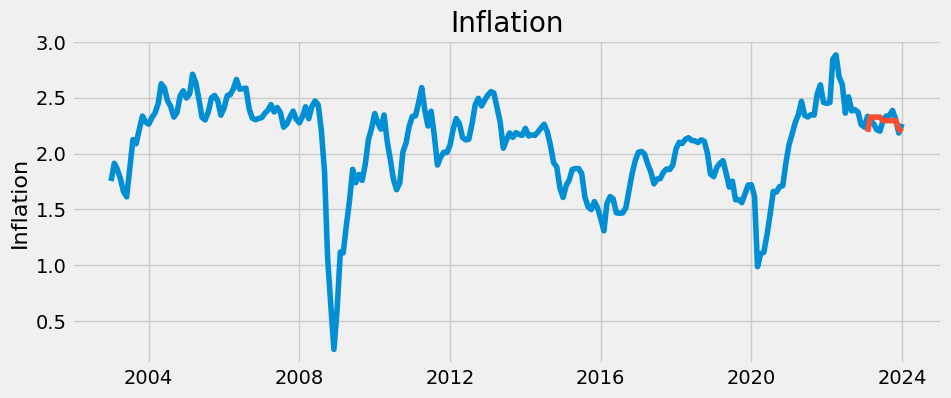

In [ ]:
#Run Model on Inflation data
build_model_init(df_inf,'Inflation')

Train size:  289
Test size:  12
[0]	validation_0-rmse:1.75816	validation_1-rmse:4.52478
[75]	validation_0-rmse:0.17796	validation_1-rmse:0.95050
Root Mean Squared Error:  0.6745
Mean Absolute Percent Error: 0.1177


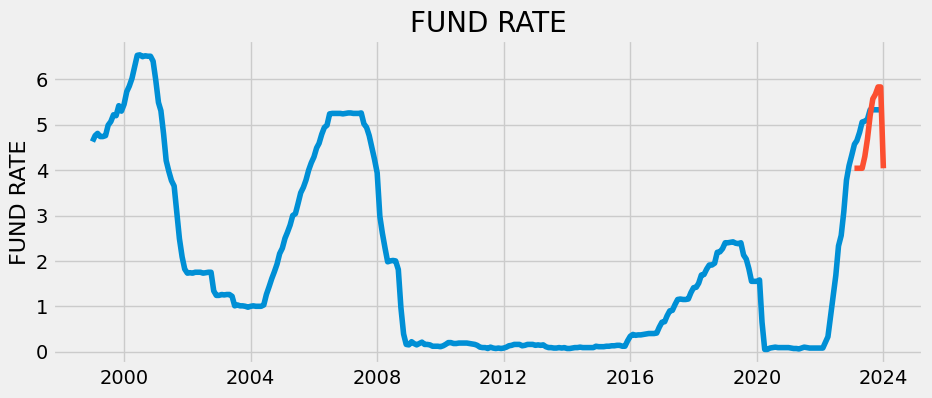

In [ ]:
#Run Model on Interest Rtae data
build_model_init(df_intr,'FUND RATE')

Train size:  279
Test size:  12
[0]	validation_0-rmse:4.10176	validation_1-rmse:2.33019
[55]	validation_0-rmse:0.21290	validation_1-rmse:0.34763
Root Mean Squared Error:  0.1783
Mean Absolute Percent Error: 0.0382


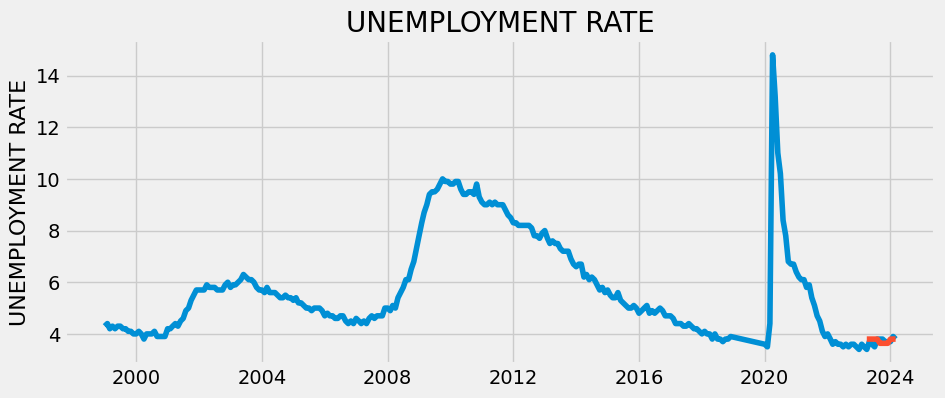

In [ ]:
#Run Model on Unemployment Rate data
build_model_init(df_unemp,'UNEMPLOYMENT RATE')

In [ ]:
# def plot_monthly_consumption(df, dependent_var):
#     """
#     This function generates a line plot of the mean monthly energy consumption for each year.

#     Parameters
#     ----------
#     df : pandas.DataFrame
#         The dataframe containing the time series data.

#     dependent_var : str
#         The column name of the dependent variable in the dataframe.

#     Returns
#     -------
#     None
#     """


#     # Assert if the required columns are present in the dataframe
#     assert 'year' in df.columns, "Input dataframe must have a 'year' column"
#     assert 'month' in df.columns, "Input dataframe must have a 'month' column"
#     assert dependent_var in df.columns, f"Input dataframe must have a '{dependent_var}' column"
#     """ Please note that this function assumes that the input dataframe has columns named year and month, and
#the column representing the dependent variable (in this case, 'PJME_MW'). If your dataframe uses different column names for these variables, you should modify the function accordingly. """

#     df_copy = df.copy()

#     # Group data by year and month, and compute the mean for each group
#     year_group = df_copy.groupby(['year', 'month']).mean().reset_index()

#     # Get the unique years from the dataframe
#     years = df_copy['year'].unique()
#     NUM_COLORS = len(years)

#     # Prepare color mapping
#     cm = plt.get_cmap('gist_rainbow')
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
#     ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

#     # Plot the mean monthly consumption for each year
#     for i, y in enumerate(years):
#         df_copy = year_group[year_group['year'] == y]
#         plt.plot(df_copy['month'], df_copy[dependent_var], linewidth=1, markersize=5)

#     plt.title('Mean Fund Rate by year')
#     plt.xlabel('month')
#     plt.ylabel('Mean Interest Rate')
#     plt.legend(df_copy.year.unique())
#     #plt.legend(df['year'].unique())
#     plt.show()

# plot_monthly_consumption(df_intr, 'FUND RATE')

# **Build Model To Predict Future Indicators**

In [ ]:
def build_model(df,indicator):
  df = df.copy()
  df['dayofweek'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear
  df['dayofmonth'] = df.index.day
  df['weekofyear'] = df.index.isocalendar().week

  FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']

  TARGET = indicator

  df_all = df[FEATURES]
  y_all = df[TARGET]

  reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
  model = reg.fit(df_all, y_all,eval_set=[(df_all, y_all)],verbose=100)

  # Create future dataframe
  future = pd.date_range('2024-03-01','2025-01-01', freq='M')
  future_df = pd.DataFrame(index=future)
  future_df['isFuture'] = True
  df['isFuture'] = False
  df_and_future = pd.concat([df, future_df])
  df_and_future = create_features(df_and_future)
  future_w_features = df_and_future.query('isFuture').copy()
  future_w_features['pred'] = reg.predict(future_w_features[FEATURES])


  future_w_features['pred'].plot(figsize=(10,4),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
  plt.show()


  fig, ax = plt.subplots(figsize=(10,4))
  y_all.plot(ax=ax, label='Original Set', title='Original /Future Prediction')
  future_w_features['pred'].plot(ax=ax, label='Forecast Set')
  ax.axvline('03-01-2024', color='black', ls='--')
  ax.legend(['Original Set', 'Future Prediction'])
  plt.title(indicator, fontsize=20)
  plt.ylabel(indicator, fontsize=16)
  plt.show()
  print(future_w_features['pred'])

  return model,future_w_features['pred']



[0]	validation_0-rmse:2.44608
[100]	validation_0-rmse:1.14815
[200]	validation_0-rmse:0.71072
[300]	validation_0-rmse:0.55737
[400]	validation_0-rmse:0.47027
[499]	validation_0-rmse:0.41358


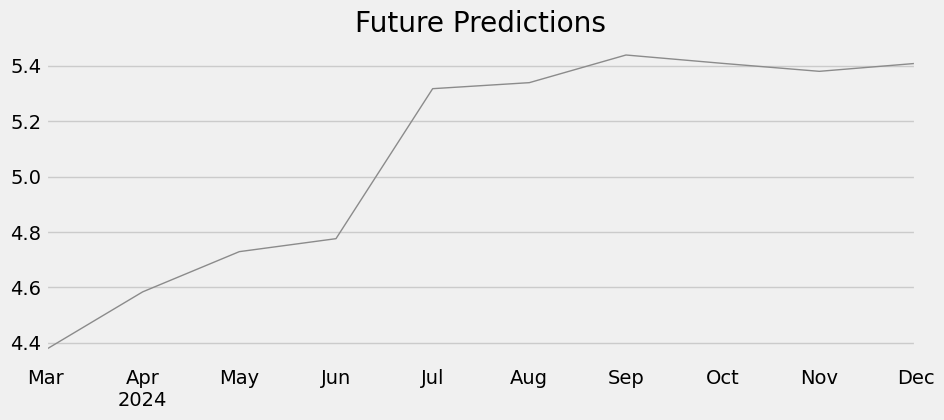

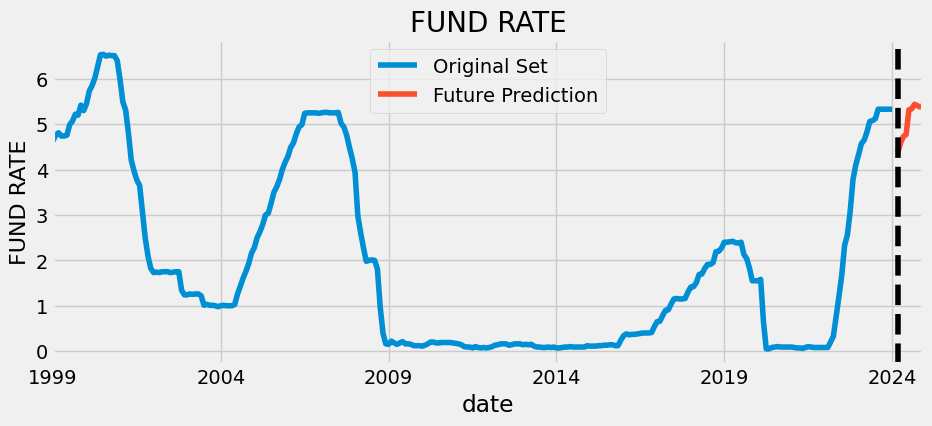

2024-03-31    4.376081
2024-04-30    4.584217
2024-05-31    4.729379
2024-06-30    4.776202
2024-07-31    5.317427
2024-08-31    5.339168
2024-09-30    5.438949
2024-10-31    5.408743
2024-11-30    5.380048
2024-12-31    5.408743
Name: pred, dtype: float32


In [ ]:
m1,prd = build_model(df_intr,"FUND RATE")

[0]	validation_0-rmse:1.61848
[100]	validation_0-rmse:0.66047
[200]	validation_0-rmse:0.34614
[300]	validation_0-rmse:0.25297
[400]	validation_0-rmse:0.20529
[499]	validation_0-rmse:0.17954


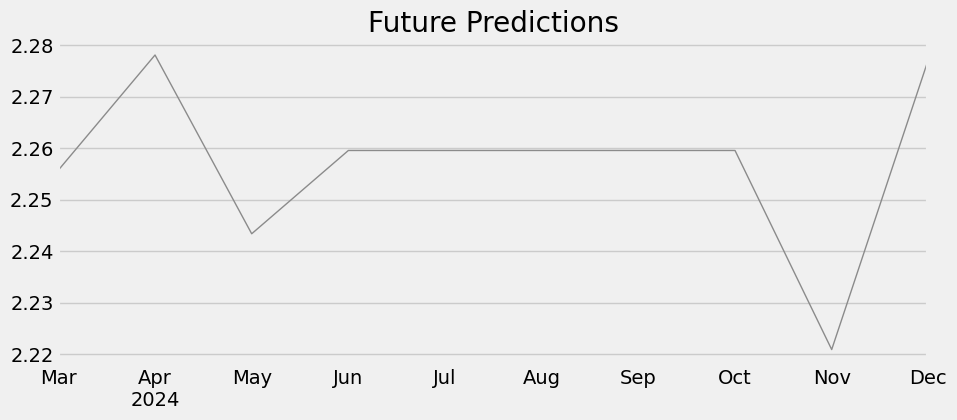

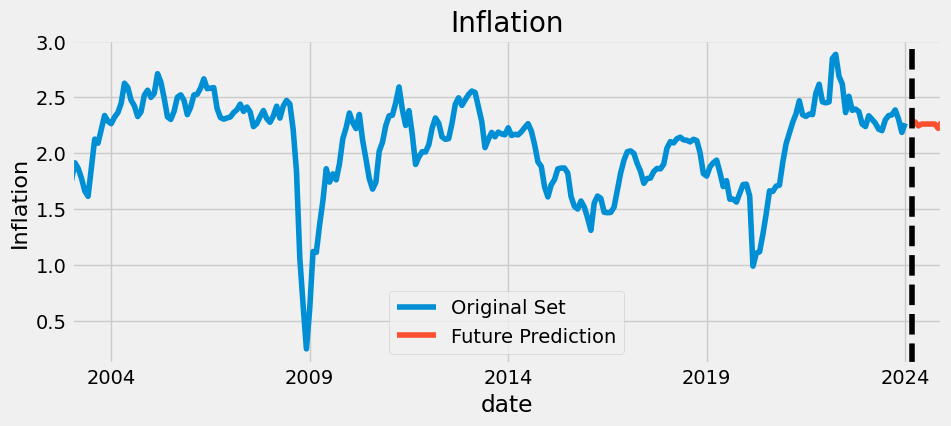

2024-03-31    2.255770
2024-04-30    2.278149
2024-05-31    2.243402
2024-06-30    2.259591
2024-07-31    2.259591
2024-08-31    2.259591
2024-09-30    2.259591
2024-10-31    2.259591
2024-11-30    2.220897
2024-12-31    2.277276
Name: pred, dtype: float32


In [ ]:
m1,prd = build_model(df_inf,"Inflation")

[0]	validation_0-rmse:5.56124
[100]	validation_0-rmse:2.27530
[200]	validation_0-rmse:1.16867
[300]	validation_0-rmse:0.80290
[400]	validation_0-rmse:0.65724
[499]	validation_0-rmse:0.60575


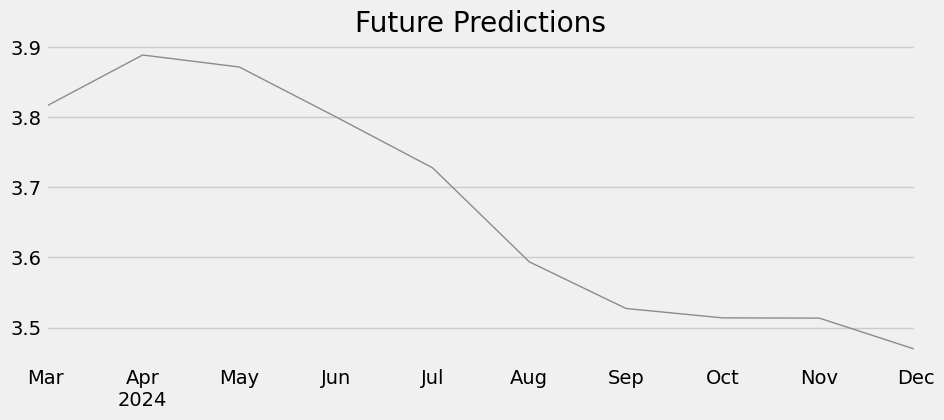

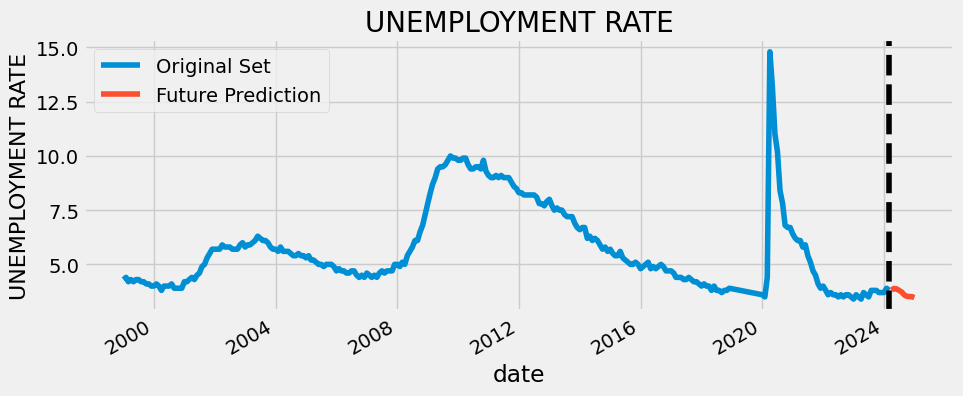

2024-03-31    3.815526
2024-04-30    3.888701
2024-05-31    3.871577
2024-06-30    3.800412
2024-07-31    3.727732
2024-08-31    3.593765
2024-09-30    3.527266
2024-10-31    3.513854
2024-11-30    3.513524
2024-12-31    3.468702
Name: pred, dtype: float32


In [ ]:
m1,prd = build_model(df_unemp,"UNEMPLOYMENT RATE")